<font color='red' size='6'>ch01 영상처리 개요 </font>
# 1절. 이미지 읽기 쓰기
- pip install opencv-python : 파이썬용 openCV 설치
- pip install opencv-contrib-python : 추가 cv 모듈 설치.
- openCV는 numpy 패키지 필수 설치

In [1]:
! pip show opencv-contrib-python

Name: opencv-contrib-python
Version: 4.10.0.84
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: c:\users\4545\appdata\roaming\python\python310\site-packages
Requires: numpy, numpy, numpy, numpy
Required-by: 


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(577, 700, 3) (577, 700, 3)


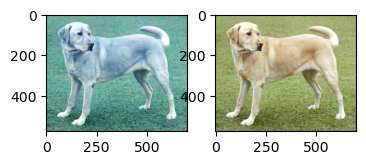

In [3]:
image_bgr = cv2.imread('data/sample.jpg', cv2.IMREAD_ANYCOLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
print(image_bgr.shape, image_rgb.shape)
fig, axes = plt.subplots(1, 2, figsize=(4,2))
axes[0].imshow(image_bgr)
axes[1].imshow(image_rgb)
plt.show()

In [4]:
# 넘파이 배열을 이미지 파일로 저장(폴더가 없으면 False, 결과가 True여야 저장 성공)
cv2.imwrite('data/openCV/bgr.jpg', image_bgr) # cv2로 저장시 bgr 포맷으로 변경된 넘파이를 저장
cv2.imwrite('data/openCV/rgb.jpg', image_rgb)

True

(577, 700) (577, 700, 3)


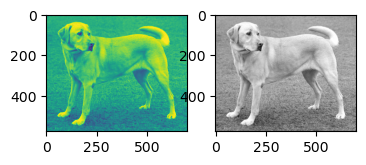

In [5]:
image_gray = cv2.imread('data/sample.jpg', cv2.IMREAD_GRAYSCALE) # gray 포맷
image_grgb = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB)# gray => rgb 포맷
print(image_gray.shape, image_grgb.shape)
fig, axes = plt.subplots(1, 2, figsize=(4,2))
axes[0].imshow(image_gray)
axes[1].imshow(image_grgb)
plt.show()

In [6]:
# 이미지 저장
cv2.imwrite('data/openCV/gray.jpg', image_gray)
cv2.imwrite('data/openCV/grgb.jpg', image_grgb)

True

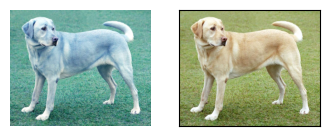

In [7]:
# BGR 포맷 이미지의 B, G, R 채널값을 조정해서 RGB 포맷으로 변경
image_bgr = cv2.imread('data/sample.jpg', cv2.IMREAD_ANYCOLOR)
b, g, r = cv2.split(image_bgr)
image_rgb = cv2.merge([r, g, b])
fig, axes = plt.subplots(1, 2, figsize=(4,2))
axes[0].imshow(image_bgr)
axes[0].axis('off')
axes[1].imshow(image_rgb)
axes[1].set_xticks([]) # x,y축을 빈 리스트
axes[1].set_yticks([])
plt.show()

# 2절. 도형그리기

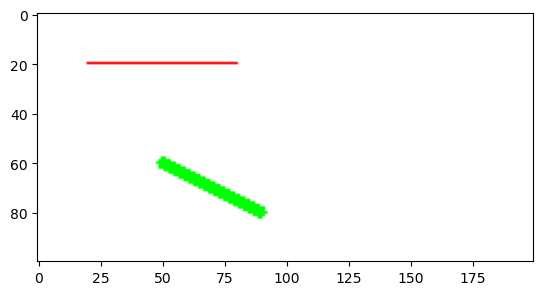

In [8]:
# 선그리기
img = np.full((100,200,3), # 100,200,3 배열 
              255, # 배열 안에 채울 값
             dtype=np.uint8) # 배열안의 값의 타입이 부호가 없는 정수(unsigned int 8 bit)
cv2.line(img, # img 위에 line을 추가
         (20,20), # 선 시작점 (x, y)
         (80,20,), # 선 끝점 (x, y)
         (255,0,0), # 선 색상 cv2에서는 BGR
         1, # 선 굵기
        )
cv2.line(img,
         (50,60),
         (90,80),
         (0,255,0),
         3
        )
cv2.imwrite('data/openCV/ling.png', img)
cv2.imshow('line',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(img)

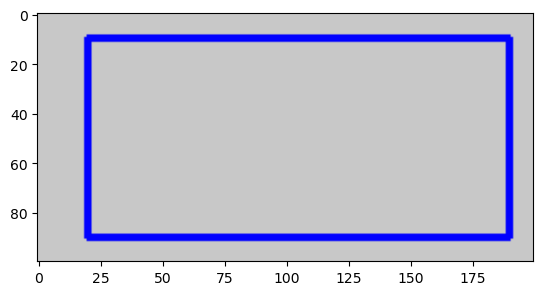

In [9]:
# 사각형 그리기
img = np.full((100,200,3), 200, dtype=np.uint8)
cv2.rectangle(img,
             (20,10), # 사각형왼쪽윗부분 좌표
             (190,90), # 사각형 오른쪽 아랫부분 좌표 
             (255,0,0) , # 사각형 색상 BGR 포맷
             2 # 두께
             )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

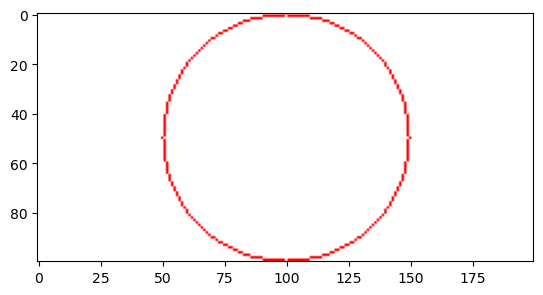

In [10]:
# 원그리기
img = np.full((100,200,3), 255, dtype=np.uint8)
cv2.circle(img, (100,50), # 원 중심점 (x, y)
           50, # 반지름
           (255,0,0) # 원 색상
          )
plt.imshow(img)
plt.show()

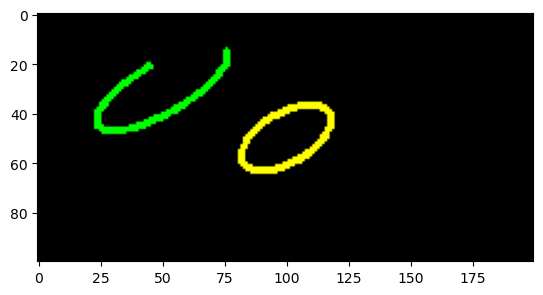

In [11]:
# 호와 타원그리기
img = np.zeros((100,200,3), dtype=np.uint8)
# 타원
cv2.ellipse(img, (100,50), # 타원의 중심
            (20,10), # 두 축의 반지름 (가로, 세로)
             -30, # 반시계방향 30도 회전
             0,360, # 타원의 시작각도 ~ 끝각도
             (0,255,255),
             2
           )

cv2.ellipse(img, (50,30), # 타원의 중심
            (30,10), # 두 축의 반지름 (가로, 세로)
             -30, # 반시계방향 30도 회전
             0,270, # 타원의 시작각도 ~ 끝각도
             (0,255,0),
             2
           )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

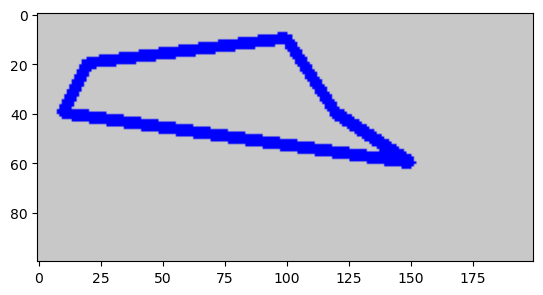

In [12]:
# 다각형
img = np.full((100,200,3), 200, dtype=np.uint8)
points = np.array([[10,40],[20,20],[100,10],[120,40],[150,60]]) # 꼭지점 좌표들(x, y)
cv2.polylines(img, [points], True, (255,0,0), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# 한글설정
plt.rc('font', family = 'Malgun Gothic')# 윈도우즈
# plt.rc('font', family = 'AppleGothic') Mac
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐방지
# warning(경고) 안보이게
import warnings
# warnings.filterwarnings(action='ignore') # 경고 메세지 안보이게
warnings.filterwarnings(action='default') # 경고 메세지 보이게
import matplotlib.pyplot as plt
import seaborn as sns

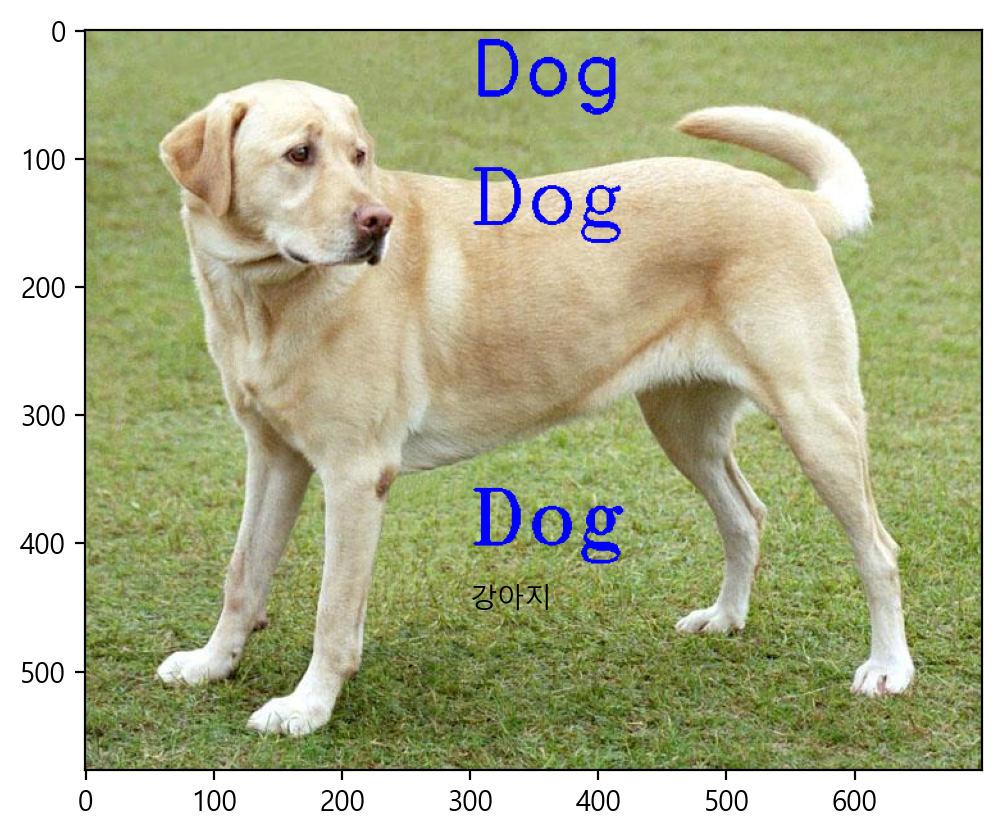

In [14]:
# 문자열 표시하기
img = cv2.imread('data/sample.jpg')
cv2.putText(img, 'Dog', # 표시될 문자열
            (300,50), # 문자열이 표시될 좌표 (x,y)
            cv2.FONT_HERSHEY_DUPLEX, # 폰트
            2, # 폰트 scale
            (255,0,0), # 폰트 색상
            2 # 폰트 두께
           )
cv2.putText(img, 'Dog',
            (300,150),
            cv2.FONT_HERSHEY_COMPLEX,
            2,
            (255,0,0),
            2)
cv2.putText(img, 'Dog',
            (300,400),
            cv2.FONT_HERSHEY_TRIPLEX,
            2,
            (255,0,0),
            2)
plt.text(300,450, '강아지')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

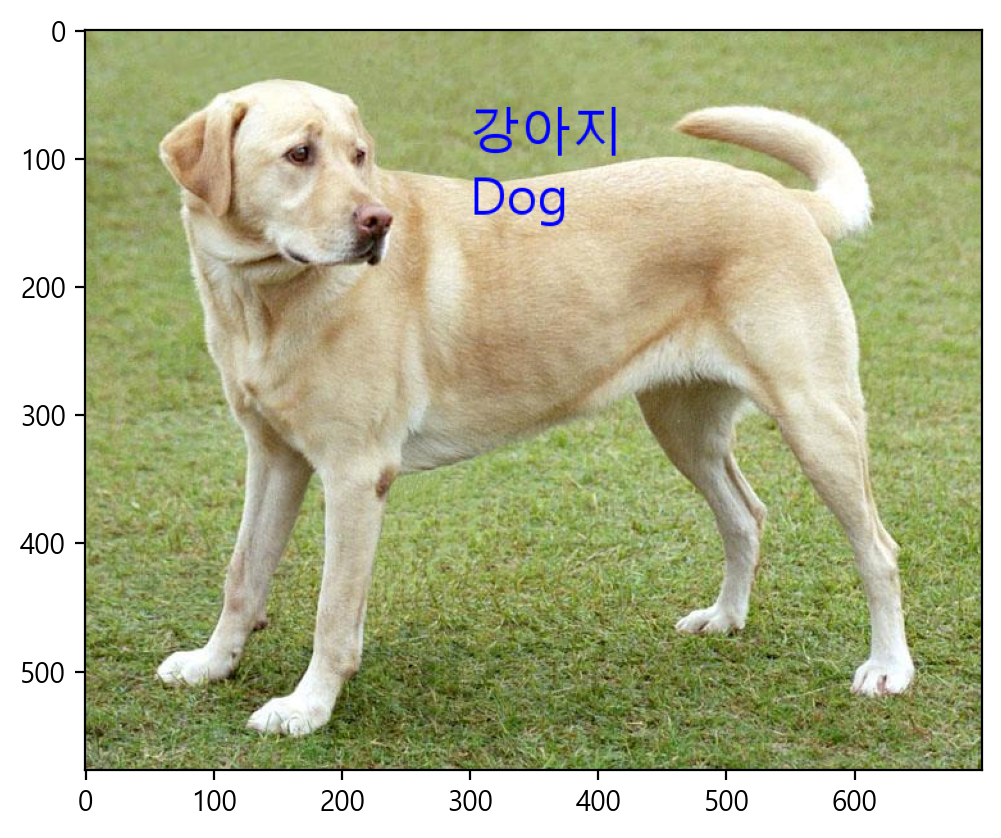

True

In [15]:
from PIL import Image, ImageDraw, ImageFont
img = cv2.imread('data/sample.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_pil = Image.fromarray(img)
draw = ImageDraw.Draw(img_pil)
font = ImageFont.truetype('malgun.ttf', 40)
draw.text((300, 50), '강아지', font=font, fill=(0, 0, 255))
draw.text((300, 100), 'Dog', font=font, fill=(0, 0, 255))

img = np.array(img_pil)
plt.imshow(img)
plt.show()

cv2.imwrite('data/openCV/sample.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))